In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision
import sys


import matplotlib.pyplot as plt
import time

In [ ]:
import torch
import torchvision

In [ ]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256 # change according to system specs
BatchSize2 = 1024 # change according to system specs


trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

trainset2 = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader2 = torch.utils.data.DataLoader(trainset2, batch_size=BatchSize2,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset2 = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader2 = torch.utils.data.DataLoader(testset2, batch_size=BatchSize2,
                                         shuffle=False, num_workers=4) # Creating dataloader                                         

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))
# Size of train and test datasets
print('No. of samples in train set2: '+str(len(trainLoader2.dataset)))
print('No. of samples in test set2: '+str(len(testLoader2.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set2: 60000
No. of samples in test set2: 10000


In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [ ]:
use_gpu = torch.cuda.is_available()
net1= LeNet()
net2= LeNet()
net3= LeNet()

print(net1)
print(net2)
print(net3)

if use_gpu:
    print('GPU is avaialble!')
    net1 = net1.cuda()
    net2 = net2.cuda()
    net3 = net3.cuda()
    

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
LeNet(
  (conv1): Conv2d(1, 6, ker

In [ ]:
criterion = nn.CrossEntropyLoss() 
learning_rate1 = 0.01
optimizer1 = optim.Adam(net1.parameters(), lr=learning_rate1) # ADAM 
num_epochs = 50

train_loss = []
train_acc = []
for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer1.zero_grad() 
        # Data feed-forward through the network
        outputs1 = net1(inputs)
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1,dim=1)
        # Finding the loss
        loss = criterion(outputs1, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds1==labels)    
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 1/50 : Training loss: 2.3069 | Training Accuracy: 9.7367
Epoch 2/50 : Training loss: 2.2817 | Training Accuracy: 10.3383
Epoch 3/50 : Training loss: 2.2004 | Training Accuracy: 10.0400
Epoch 4/50 : Training loss: 1.9440 | Training Accuracy: 52.8933
Epoch 5/50 : Training loss: 1.5103 | Training Accuracy: 54.0317
Epoch 6/50 : Training loss: 1.7296 | Training Accuracy: 37.6667
Epoch 7/50 : Training loss: 1.7392 | Training Accuracy: 47.2700
Epoch 8/50 : Training loss: 1.2504 | Training Accuracy: 55.2300
Epoch 9/50 : Training loss: 1.1325 | Training Accuracy: 62.2317
Epoch 10/50 : Training loss: 1.1187 | Training Accuracy: 65.3417
Epoch 11/50 : Training loss: 1.0605 | Training Accuracy: 68.0333
Epoch 12/50 : Training loss: 0.9544 | Training Accuracy: 70.1933
Epoch 13/50 : Training loss: 0.8173 | Training Accuracy: 72.9617
Epoch 14/50 : Training loss: 0.6738 | Training Accuracy: 77.5550
Epoch 15/50 : Training loss: 0.5924 | Training Accuracy: 81.4383
Epoch 16/50 : Training loss: 0.6357

Text(0, 0.5, 'Training')

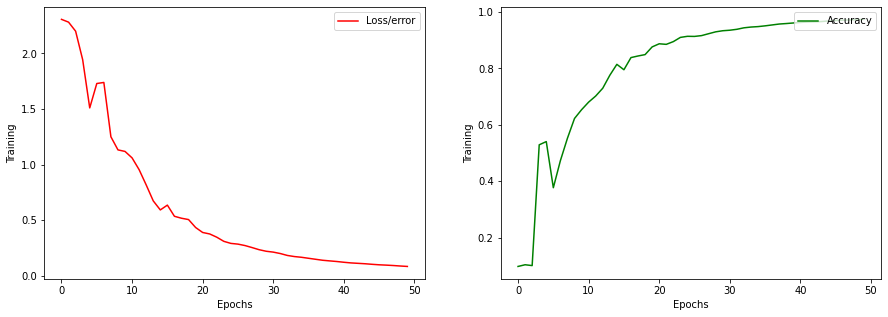

In [ ]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

[1.1187031198055186, 0.29125535031582445, 0.08396876720671959]


Text(0, 0.5, 'Loss')

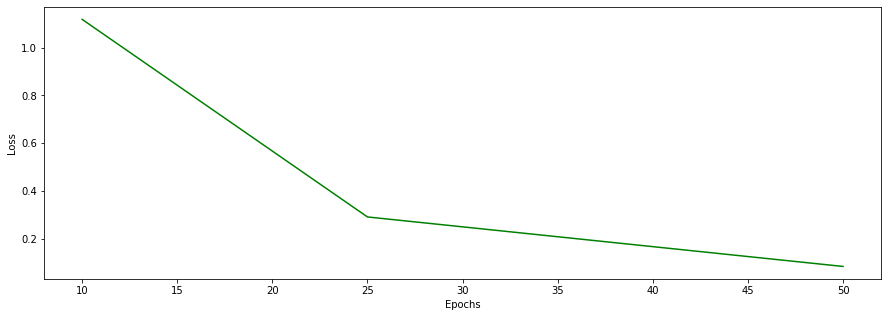

In [ ]:
epochs=[10,25,50]
new_loss=[train_loss[9],train_loss[24],train_loss[49]]
print(new_loss)
fig = plt.figure(figsize=[15,5]) 
plt.plot(epochs,new_loss,'g-',label='Epochs vs Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')

## For different Learning rates

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 1/25 : Training loss: 0.0810 | Training Accuracy: 97.4733
Epoch 2/25 : Training loss: 4.8240 | Training Accuracy: 38.3417
Epoch 3/25 : Training loss: 0.3698 | Training Accuracy: 88.6017
Epoch 4/25 : Training loss: 0.7500 | Training Accuracy: 82.0167
Epoch 5/25 : Training loss: 1.0452 | Training Accuracy: 77.1450
Epoch 6/25 : Training loss: 0.7599 | Training Accuracy: 80.6983
Epoch 7/25 : Training loss: 0.5422 | Training Accuracy: 84.8883
Epoch 8/25 : Training loss: 0.4766 | Training Accuracy: 86.5033
Epoch 9/25 : Training loss: 0.4721 | Training Accuracy: 86.8750
Epoch 10/25 : Training loss: 0.4793 | Training Accuracy: 87.0250
Epoch 11/25 : Training loss: 0.4725 | Training Accuracy: 87.7467
Epoch 12/25 : Training loss: 0.4517 | Training Accuracy: 88.9850
Epoch 13/25 : Training loss: 0.4201 | Training Accuracy: 90.7183
Epoch 14/25 : Training loss: 0.3804 | Training Accuracy: 92.3567
Epoch 15/25 : Training loss: 0.3350 | Training Accuracy: 93.5767
Epoch 16/25 : Training loss: 0.289

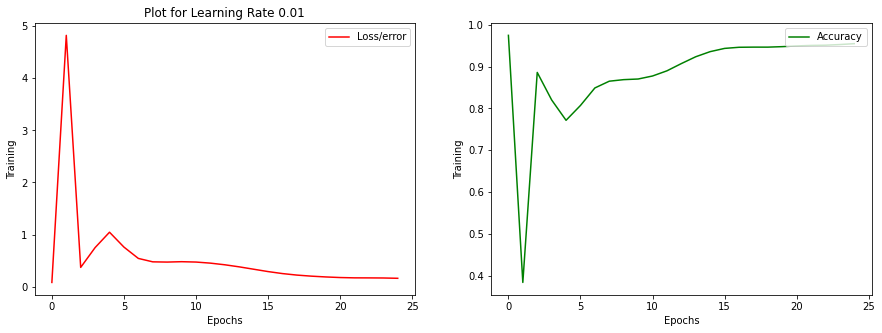

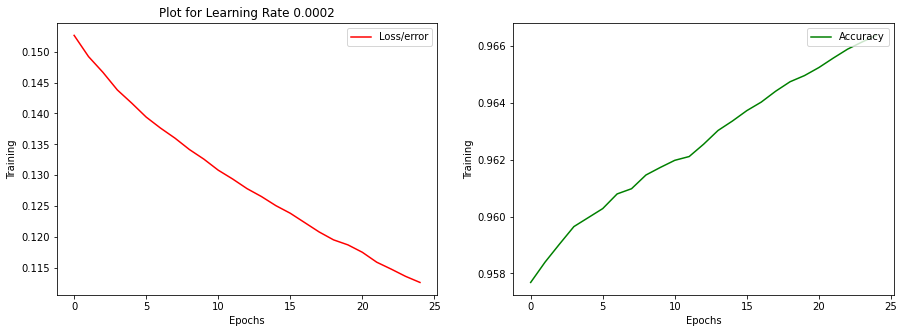

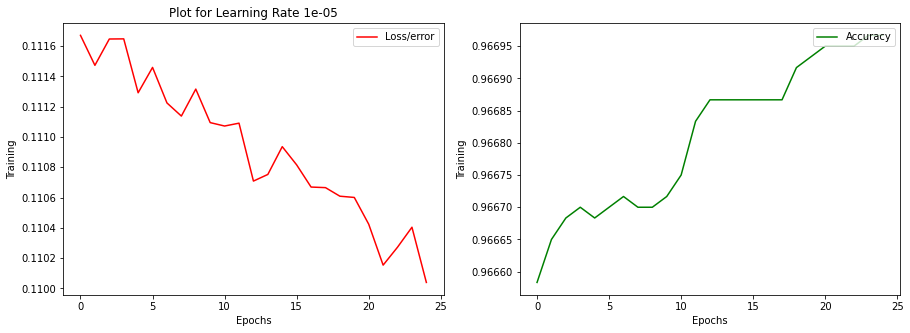

In [ ]:
criterion = nn.CrossEntropyLoss() 
learning_rate1 = [0.01,0.0002,0.00001]
 
num_epochs = 25

for lrate in learning_rate1:
  optimizer1 = optim.Adam(net1.parameters(), lr=lrate) # ADAM
  train_loss = []
  train_acc = []
  for epoch in range(num_epochs):
      
      running_loss = 0.0 
      running_corr = 0
          
      for i,data in enumerate(trainLoader):
          inputs,labels = data
          if use_gpu:
              inputs, labels = inputs.cuda(),labels.cuda() 
          # Initializing model gradients to zero
          optimizer1.zero_grad() 
          # Data feed-forward through the network
          outputs1 = net1(inputs)
          # Predicted class is the one with maximum probability
          preds1 = torch.argmax(outputs1,dim=1)
          # Finding the loss
          loss = criterion(outputs1, labels)
          # Accumulating the loss for each batch
          running_loss += loss 
          # Accumulate number of correct predictions
          running_corr += torch.sum(preds1==labels)    
          
      totalLoss1 = running_loss/(i+1)
      # Calculating gradients
      totalLoss1.backward()
      # Updating the model parameters
      # Updating the model parameters
      optimizer1.step()
          
      epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
      epoch_acc = running_corr.item()/60000
      
      
          
      train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
      train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
        
          
      print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))
  fig = plt.figure(figsize=[15,5]) 
  plt.subplot(121)
  plt.title(f"Plot for Learning Rate {lrate}")
  plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')
  plt.subplot(122)
  plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')

### For different loss functions

In [ ]:
criterion = nn.MSELoss()
learning_rate1 = 0.001
optimizer1 = optim.Adam(net1.parameters(), lr=learning_rate1) # ADAM 
num_epochs = 25

train_loss = []
train_acc = []
for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer1.zero_grad() 
        # Data feed-forward through the network
        outputs1 = net1(inputs)
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1,dim=1)
        # Finding the loss
        loss = criterion(outputs1, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds1==labels)    
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.title(f"Plot for Mean Squared Loss")
plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

In [ ]:
correct_pred1=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net1(inputs) 
    # Predicted class is the one with maximum probability
    preds1 = torch.argmax(output,dim=1)
    correct_pred1 += torch.sum(preds1==labels)

test_accuracy = correct_pred1.item()/10000.0
print('Testing accuracy (Batch size=256, lr=0.1 = ',test_accuracy*100) #for bathch1

Testing accuracy (Batch size=256, lr=0.1 =  96.61


In [ ]:
criterion = nn.CrossEntropyLoss() 
learning_rate2 = 0.01
optimizer2 = optim.Adam(net2.parameters(), lr=learning_rate2) # ADAM 
num_epochs2 = 50

train_loss2 = []
train_acc2 = []
for epoch in range(num_epochs2):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader2):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer2.zero_grad() 
        # Data feed-forward through the network
        outputs2 = net2(inputs)
        # Predicted class is the one with maximum probability
        preds2 = torch.argmax(outputs2,dim=1)
        # Finding the loss
        loss = criterion(outputs2, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds2==labels)    
        
    totalLoss2 = running_loss/(i+1)
    # Calculating gradients
    totalLoss2.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer2.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss2.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc2.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs2,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3032 | Training Accuracy: 10.2250
Epoch 2/50 : Training loss: 2.2704 | Training Accuracy: 9.7517
Epoch 3/50 : Training loss: 2.1624 | Training Accuracy: 35.8283
Epoch 4/50 : Training loss: 1.8515 | Training Accuracy: 44.3183
Epoch 5/50 : Training loss: 1.5990 | Training Accuracy: 49.3683
Epoch 6/50 : Training loss: 1.9866 | Training Accuracy: 38.2533
Epoch 7/50 : Training loss: 1.3789 | Training Accuracy: 52.9950
Epoch 8/50 : Training loss: 1.1332 | Training Accuracy: 63.6933
Epoch 9/50 : Training loss: 1.1985 | Training Accuracy: 55.7800
Epoch 10/50 : Training loss: 1.0598 | Training Accuracy: 64.2917
Epoch 11/50 : Training loss: 0.8300 | Training Accuracy: 76.1850
Epoch 12/50 : Training loss: 0.6736 | Training Accuracy: 79.7483
Epoch 13/50 : Training loss: 0.6015 | Training Accuracy: 80.8333
Epoch 14/50 : Training loss: 0.5841 | Training Accuracy: 79.7733
Epoch 15/50 : Training loss: 0.5376 | Training Accuracy: 83.8483
Epoch 16/50 : Training loss: 0.5272

Text(0, 0.5, 'Training Accuracy')

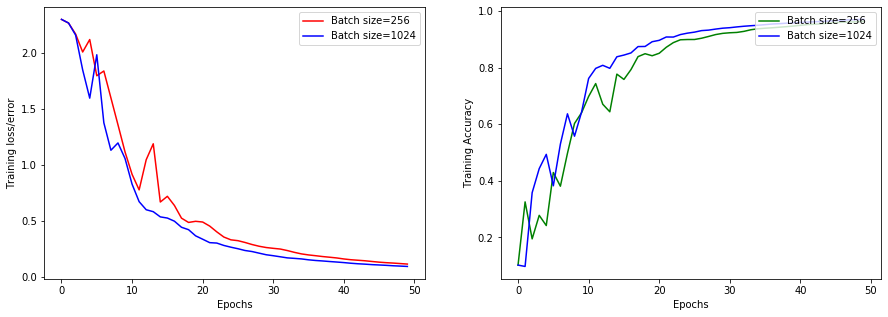

In [ ]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Batch size=256') 
plt.plot(range(num_epochs2),train_loss2,'r-',color='blue',label='Batch size=1024') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Batch size=256') 
plt.plot(range(num_epochs2),train_acc2,'g-', color='blue',label='Batch size=1024') #learning rate in both is same
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [ ]:
correct_pred2=0
for data in testLoader2:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net2(inputs) 
    # Predicted class is the one with maximum probability
    preds2 = torch.argmax(output,dim=1)
    correct_pred2 += torch.sum(preds2==labels)

test_accuracy2 = correct_pred2.item()/10000.0
print('Testing accuracy (Batch size=1024, lr=0.1) = ',test_accuracy2*100) #for bathch1

Testing accuracy (Batch size=1024, lr=0.1) =  97.37


In [ ]:
criterion = nn.CrossEntropyLoss() 
learning_rate3 = 0.001
optimizer3 = optim.Adam(net3.parameters(), lr=learning_rate3) # ADAM 
num_epochs3 = 50

train_loss3 = []
train_acc3 = []
for epoch in range(num_epochs3):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer3.zero_grad() 
        # Data feed-forward through the network
        outputs3 = net3(inputs)
        # Predicted class is the one with maximum probability
        preds3 = torch.argmax(outputs3,dim=1)
        # Finding the loss
        loss = criterion(outputs3, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds3==labels)    
        
    totalLoss3 = running_loss/(i+1)
    # Calculating gradients
    totalLoss3.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer3.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss3.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc3.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs3,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3033 | Training Accuracy: 10.4417
Epoch 2/50 : Training loss: 2.2997 | Training Accuracy: 10.4417
Epoch 3/50 : Training loss: 2.2960 | Training Accuracy: 10.4417
Epoch 4/50 : Training loss: 2.2917 | Training Accuracy: 10.4417
Epoch 5/50 : Training loss: 2.2867 | Training Accuracy: 11.3933
Epoch 6/50 : Training loss: 2.2807 | Training Accuracy: 17.0700
Epoch 7/50 : Training loss: 2.2730 | Training Accuracy: 30.6200
Epoch 8/50 : Training loss: 2.2635 | Training Accuracy: 37.1500
Epoch 9/50 : Training loss: 2.2523 | Training Accuracy: 38.8483
Epoch 10/50 : Training loss: 2.2386 | Training Accuracy: 40.0450
Epoch 11/50 : Training loss: 2.2221 | Training Accuracy: 41.9050
Epoch 12/50 : Training loss: 2.2025 | Training Accuracy: 43.8117
Epoch 13/50 : Training loss: 2.1797 | Training Accuracy: 45.2633
Epoch 14/50 : Training loss: 2.1534 | Training Accuracy: 46.2800
Epoch 15/50 : Training loss: 2.1223 | Training Accuracy: 47.5783
Epoch 16/50 : Training loss: 2.086

Text(0, 0.5, 'Training Accuracy')

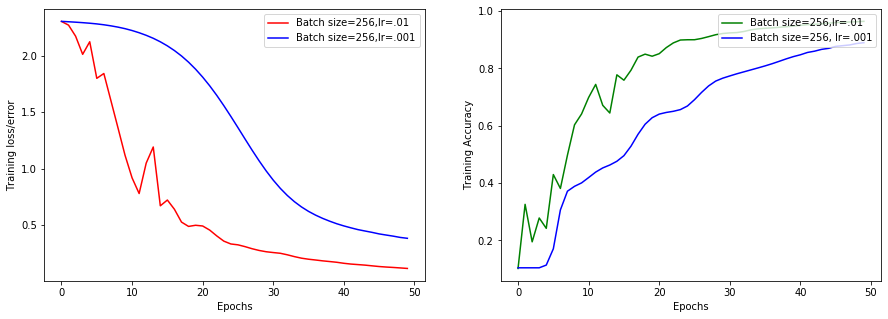

In [ ]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Batch size=256,lr=.01') 
plt.plot(range(num_epochs),train_loss3,'r-',color='blue',label='Batch size=256,lr=.001') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Batch size=256,lr=.01') 
plt.plot(range(num_epochs),train_acc3,'g-', color='blue',label='Batch size=256, lr=.001') 
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [ ]:
correct_pred3=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net3(inputs) 
    # Predicted class is the one with maximum probability
    preds3 = torch.argmax(output,dim=1)
    correct_pred3 += torch.sum(preds3==labels)

test_accuracy3 = correct_pred3.item()/10000.0
print('Testing accuracy (Batch size=256, lr=.01) = ',test_accuracy3*100) #for bathch1

Testing accuracy (Batch size=256, lr=.01) =  89.66
